# Project 1, Part 5, Data Visualization



# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)
    

In [3]:
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

# 1.5 Example of a Data Visualization created using Python

The data science team would like for you to create an example of a data visualization using Python from data in a Pandas dataframe containing data from an SQL query.

Write 1 and only 1 query.  Note that the query may have as many subqueries, including "with" clauses, as you wish.  Any query of your choosing.  You can write a query from scratch.  You can use a query from a previous problem in this project.  You can use a query from the labs.  The idea is to come up with a query whose resulting data will make for an excellent quality data visualization. 

Ensure that when you check this Juptyer Notebook into GitHub that the query results in the Pandas dataframe are clearly visible in GitHub.  Note: When a query result has a large number of rows, Pandas will only display the first 5 rows, a row with ellipses, and the last 5 rows. This is ok.

Once you have the data in a Pandas dataframe, you may write as much Python code and use as many code cells as you wish to produce the data visualization.

You may only use Python modules that are currently installed in the Anaconda Docker container.  You may not install additional modules or any other software.

All work must be done in Docker in your VM in AWS.  You may not use any external data visualization systems, such as Tableau, etc.

You may use any code from the labs to pattern your code after, however for the data visualization, you cannot wholesale copy a data visualization from the labs.

Ensure that it is properly titled, including titles for axes if present.

Ensure that when you check this Juptyer Notebook into GitHub that the data visualization is clearly visible.  

If you want to use Google Maps for your data visualization, this is fine, however, the image will not show up in GitHub.  So, just save the image to an image file, include it in the repo, and add a markdown cell to display the image file. Also with Google Maps, do NOT check gmap_api_key.txt into GitHub for security reasons.  If the grader needs to run it, they will supply their own gmap_api_key.txt.


In [4]:


rollback_before_flag = True
rollback_after_flag = True

query = """
Select 
       extract(month from sa.sale_date) as month_number,
       to_char(sa.sale_date, 'Month') as month,
       p.description as meal_name,
       sum(l.quantity) as total_meals_purchased
       
From sales sa
     join line_items as l
        on sa.store_id = l.store_id and sa.sale_id = l.sale_id
    join products as p
        on l.product_id = p.product_id
    
    
GROUP by month_number, month, meal_name
ORDER by month_number, month, meal_name

"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,month_number,month,meal_name,total_meals_purchased
0,1,January,Brocolli Stir Fry,72161
1,1,January,Chicken Salad,18003
2,1,January,Curry Chicken,108134
3,1,January,Eggplant Lasagna,126605
4,1,January,Pistachio Salmon,144053
...,...,...,...,...
91,12,December,Eggplant Lasagna,134666
92,12,December,Pistachio Salmon,154242
93,12,December,Spinach Orzo,38297
94,12,December,Teriyaki Chicken,96896


In [5]:
# Use as many code cells as you need to create and display your data visualization
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline


In [6]:
df.meal_name.value_counts()

Brocolli Stir Fry    12
Chicken Salad        12
Curry Chicken        12
Eggplant Lasagna     12
Pistachio Salmon     12
Spinach Orzo         12
Teriyaki Chicken     12
Tilapia Piccata      12
Name: meal_name, dtype: int64

In [18]:
#Make individual dataframe for each meal type
Brocolli = df[df['meal_name']== 'Brocolli Stir Fry'].reset_index(drop =True)
Chickensalad = df[df['meal_name']== 'Chicken Salad'].reset_index(drop =True)
Currychicken = df[df['meal_name']== 'Curry Chicken'].reset_index(drop =True)
Pistachiosalmon = df[df['meal_name']== 'Pistachio Salmon'].reset_index(drop =True)
Spinachorzo = df[df['meal_name']== 'Spinach Orzo'].reset_index(drop =True)
Terichicken = df[df['meal_name']== 'Teriyaki Chicken'].reset_index(drop =True)
Tilapiapiccata = df[df['meal_name']== 'Tilapia Piccata'].reset_index(drop =True)
EggplantLasgna = df[df['meal_name']== 'Eggplant Lasagna'].reset_index(drop =True)
#drop month_number
Brocolli = Brocolli[['month','total_meals_purchased']]
Chickensalad = Chickensalad[['month','total_meals_purchased']]
Currychicken = Currychicken[['month', 'total_meals_purchased']]
Pistachiosalmon = Pistachiosalmon[['month', 'total_meals_purchased']]
Spinachorzo = Spinachorzo[['month',  'total_meals_purchased']]
Terichicken = Terichicken[['month', 'total_meals_purchased']]
Tilapiapiccata = Tilapiapiccata[['month',  'total_meals_purchased']]
EggplantLasgna = EggplantLasgna[['month',  'total_meals_purchased']]


In [8]:
#Check to make sure we have the dataframe we want
Brocolli

,month,total_meals_purchased
0,January,72161
1,February,70164
2,March,81036
3,April,76380
4,May,73911
5,June,75393
6,July,73938
7,August,83526
8,September,69997
9,October,82409


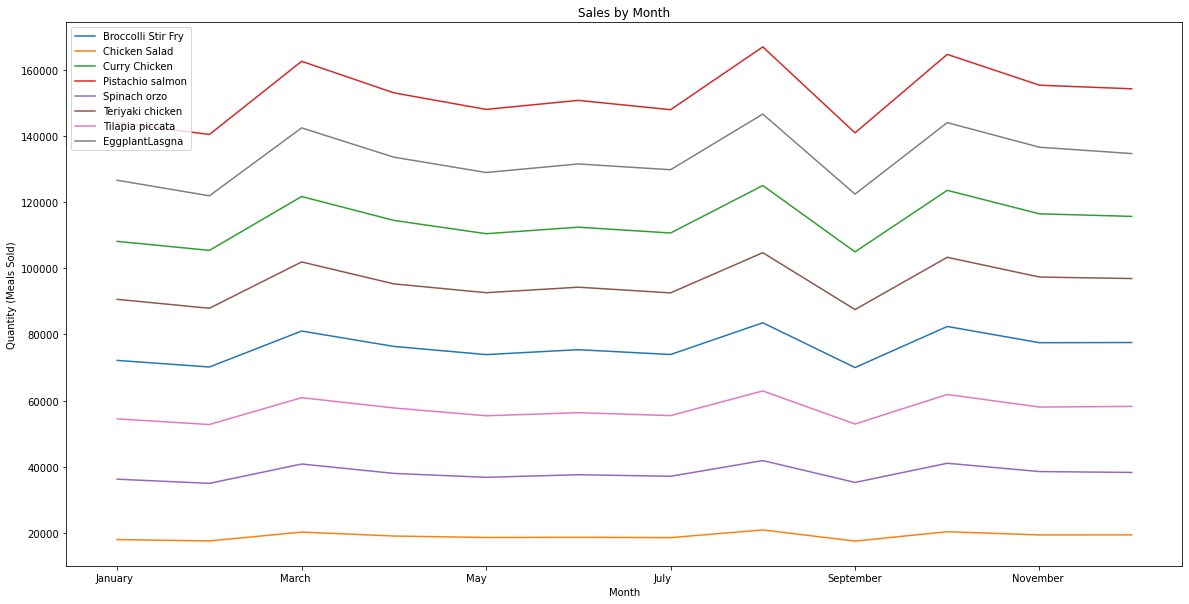

In [19]:
#plot all meals sold on the same graph

ax = Brocolli.plot(x='month', y='total_meals_purchased', figsize=(20,10), label = 'Broccolli Stir Fry', legend= True)
Chickensalad.plot(x='month', y='total_meals_purchased', ax = ax, label = 'Chicken Salad', legend= True)
Currychicken.plot(x='month', y='total_meals_purchased', ax = ax, label = 'Curry Chicken', legend= True)
Pistachiosalmon.plot(x='month', y='total_meals_purchased', ax = ax, label = 'Pistachio salmon', legend= True)
Spinachorzo.plot(x='month', y='total_meals_purchased', ax = ax, label = 'Spinach orzo', legend= True)
Terichicken.plot(x='month', y='total_meals_purchased', ax = ax, label = 'Teriyaki chicken', legend= True)
Tilapiapiccata.plot(x='month', y='total_meals_purchased', ax = ax, label = 'Tilapia piccata', legend= True)
EggplantLasgna.plot(x='month', y='total_meals_purchased', ax = ax, label = 'EggplantLasgna', legend= True)


#https://stackoverflow.com/questions/45467320/plot-multiple-pandas-dataframes-in-one-graph 
#learned to set first dataframe plot as ax then using ax =ax on subsequent plots to plot all dataframe on the same plot

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Quantity (Meals Sold)')
plt.show()